In [1]:
from sklearn.datasets import load_iris
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy import log,dot,exp,shape
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

## سوال یک

In [2]:
data = load_iris()

### نرمال سازی و تقسیم بندی

In [3]:
x_train,x_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.2)
x_test,x_val,y_test,y_val =train_test_split(x_test,y_test,test_size=0.5)

In [4]:
X_train_norm = (x_train - x_train.min()) / (x_train.max() - x_train.min())
y_train_norm = (y_train - y_train.min()) / (y_train.max() - y_train.min())

In [5]:
X_test_norm = (x_test - x_test.min()) / (x_test.max() - x_test.min())
y_test_norm = (y_test - y_test.min()) / (y_test.max() - y_test.min())

In [6]:
X_val_norm = (x_val - x_val.min()) / (x_val.max() - x_val.min())
y_val_norm = (y_val - y_val.min()) / (y_val.max() - y_val.min())

## قسمت الف

In [7]:
class LogidticRegression:
    def sigmoid(self,z):
        sig = 1/(1+exp(-z))
        return sig
    def initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X
    def fit(self,X,y,alpha=0.01,iter=100):
        weights,X = self.initialize(X)
        def cost(theta):
            z = dot(X,theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
        cost_list = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha*dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list
    def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis


In [8]:
obj1 = LogidticRegression()

In [9]:
cost_list= obj1.fit(X_train_norm,y_train_norm)

In [10]:
y_pred = obj1.predict(X_test_norm)
y_train_f = obj1.predict(X_train_norm)

## قسمت ب

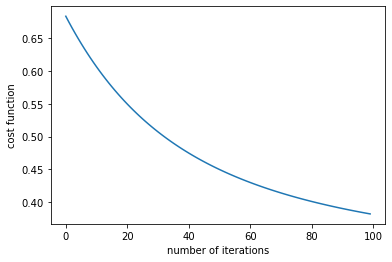

In [11]:
plt.plot(cost_list)
plt.xlabel("number of iterations")
plt.ylabel("cost function")
plt.show()

## قسمت ج

In [12]:
obj2 = LogidticRegression()

In [13]:
cost_list_1= obj2.fit(X_train_norm,y_train_norm)

In [14]:
y_pred_1 = obj2.predict(X_val_norm)
y_train_f_1 = obj1.predict(X_train_norm)

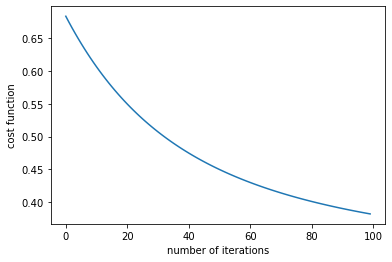

In [15]:
plt.plot(cost_list_1)
plt.xlabel("number of iterations")
plt.ylabel("cost function")
plt.show()

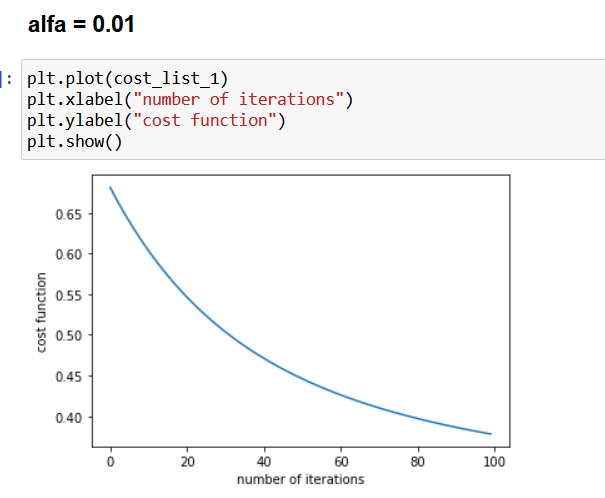

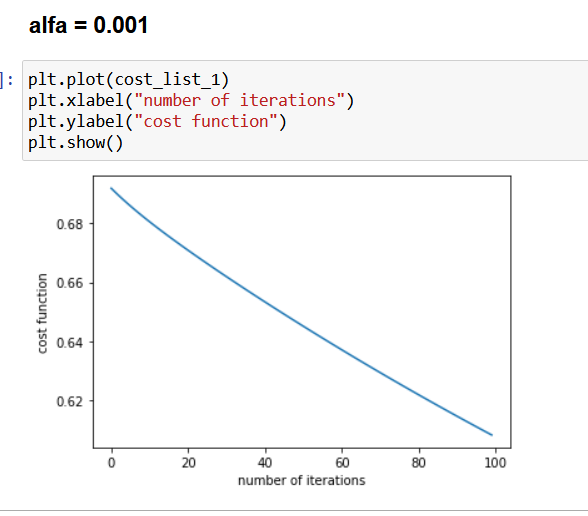

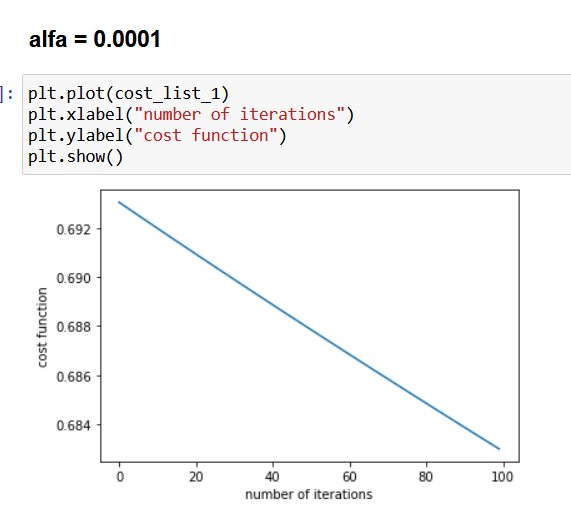

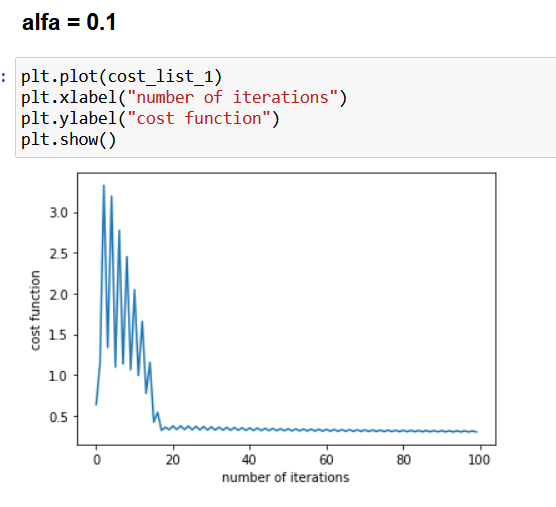

### با توجه به نمودار ها آلفای برابر یک صدم از بقیه بهتر است

## قسمت د

In [16]:
x = data['data'][:,:2]
y = (data['target']==0).astype('int')

In [17]:
reg = LogisticRegression() 
reg.fit(x_train,y_train)

LogisticRegression()

In [18]:
reg.predict(x_test),y_test

(array([2, 2, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0, 0, 2]),
 array([2, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0, 0, 2]))

In [19]:
reg.score(x_test,y_test)

0.9333333333333333

## سوال دو

## قسمت الف

In [20]:
df = pd.read_csv('sin.csv')

In [21]:
df.head()

,0,1,2
0,0.873008,0.672227,0.0
1,0.534722,0.671441,1.0
2,0.725173,0.577389,0.0
3,0.851713,0.612270,0.0
4,0.205497,0.498256,1.0


In [22]:
X_1 = df.drop(['2'], axis=1)
y_1 = df['2']

In [23]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.2, random_state = 0)

In [24]:
cols = X_train_1.columns

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train_1)
X_test_1 = scaler.transform(X_test_1)

In [26]:
y_train_1 = np.array(y_train_1)
y_test_1 = np.array(y_test_1)

C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


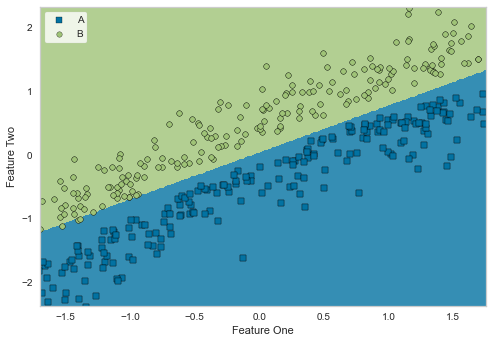

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [27]:
from sklearn.svm import SVC
from yellowbrick.contrib.classifier import DecisionViz
viz0 = DecisionViz(
    SVC(kernel="linear", C=0.025), title="Linear SVM",
    features=['Feature One', 'Feature Two'], classes=['A', 'B']
)
viz0.fit(X_train_1, y_train_1)
viz0.draw(X_train_1, y_train_1)
viz0.show()

## قسمت ب

### c = 0.002

C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


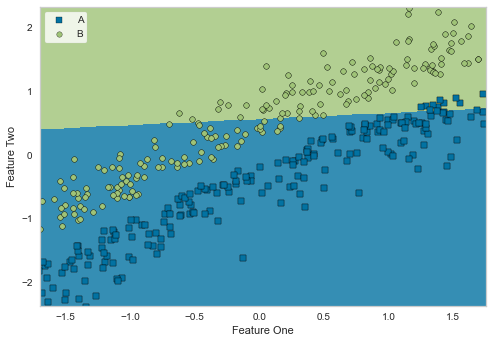

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [28]:
from sklearn.svm import SVC
from yellowbrick.contrib.classifier import DecisionViz
viz = DecisionViz(
    SVC(kernel="linear", C=0.002), title="Linear SVM",
    features=['Feature One', 'Feature Two'], classes=['A', 'B']
)
viz.fit(X_train_1, y_train_1)
viz.draw(X_train_1, y_train_1)
viz.show()

### c=0.02

C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


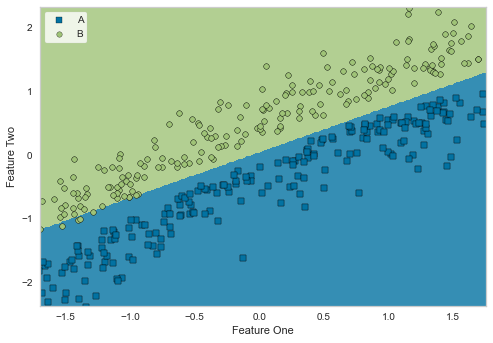

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [29]:
from sklearn.svm import SVC
from yellowbrick.contrib.classifier import DecisionViz
viz1 = DecisionViz(
    SVC(kernel="linear", C=0.02), title="Linear SVM",
    features=['Feature One', 'Feature Two'], classes=['A', 'B']
)
viz1.fit(X_train_1, y_train_1)
viz1.draw(X_train_1, y_train_1)
viz1.show()

### c=2

C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


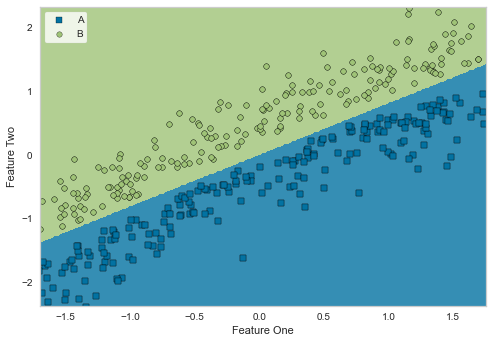

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [30]:
from sklearn.svm import SVC
from yellowbrick.contrib.classifier import DecisionViz
viz2 = DecisionViz(
    SVC(kernel="linear", C=2), title="Linear SVM",
    features=['Feature One', 'Feature Two'], classes=['A', 'B']
)
viz2.fit(X_train_1, y_train_1)
viz2.draw(X_train_1, y_train_1)
viz2.show()

#### برای مقادیر کوچک سی  بهینه ساز به دنبال یک هایپر پلین است به گونه ای که حاشیه را حداکثر کند حتی اگر آن صفحه نقاط بیشتری را به اشتباه طبقه بندی کند به همین دلیل است که زمانی که سی را دو هزارم دادیم طبقه بندی اشتباهی دریافت کردیم

#### برای مقادیر بزرگ سی بهینه ساز یک ابر صفحه با حاشیه ی کوچک تر را انتخاب میکند در صورتی که آن ابر صفحه کارآیی بهتری در طبقه بندی صحیح تمام نقاط آموزشی ارائه دهد که همان طور که میبینیم زمانی که سی را بزرگ تر کردیم طبقه بندی به درستی انجام شد 

## قسمت ج

In [31]:
df1 = pd.read_csv('sin_p.csv')

In [32]:
df1.head()

,0,1,2
0,0.986949,0.939815,1.0
1,1.763301,1.129499,1.0
2,2.818990,0.021507,0.0
3,0.688434,1.046776,1.0
4,3.711935,-0.770877,0.0


In [33]:
X_2 = df1.drop(['2'], axis=1)
y_2 = df1['2']

In [34]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.1, random_state = 0)

In [35]:
scaler1 = StandardScaler()
X_train_2 = scaler1.fit_transform(X_train_2)
X_test_2 = scaler1.transform(X_test_2)

In [36]:
y_train_2 = np.array(y_train_2)
y_test_2 = np.array(y_test_2)

C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


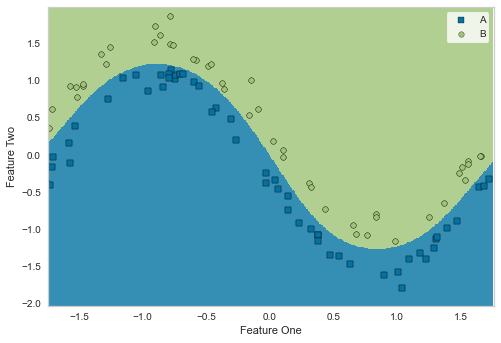

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [37]:
vizp = DecisionViz(
    SVC(kernel="rbf", C=1), title="gussian SVM",
    features=['Feature One', 'Feature Two'], classes=['A', 'B']
)
vizp.fit(X_train_2, y_train_2)
vizp.draw(X_test_2, y_test_2)
vizp.show()

## قسمت د

## C

### c = 0.01

C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


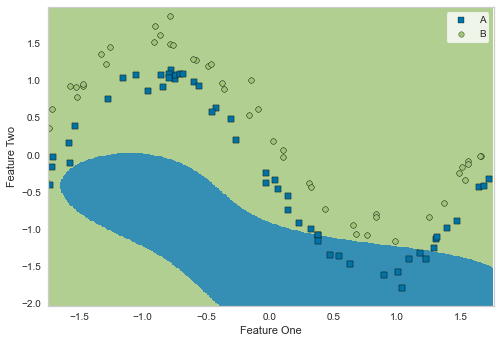

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [38]:
vizp1 = DecisionViz(
    SVC(kernel="rbf", C=0.01), title="gussian SVM",
    features=['Feature One', 'Feature Two'], classes=['A', 'B']
)
vizp1.fit(X_train_2, y_train_2)
vizp1.draw(X_test_2, y_test_2)
vizp1.show()

### c=0.1

C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


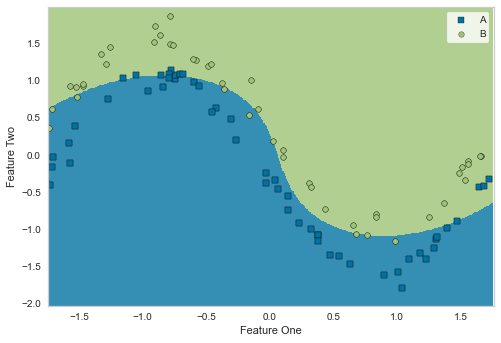

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [39]:
vizp2 = DecisionViz(
    SVC(kernel="rbf", C=0.1), title="gussian SVM",
    features=['Feature One', 'Feature Two'], classes=['A', 'B']
)
vizp2.fit(X_train_2, y_train_2)
vizp2.draw(X_test_2, y_test_2)
vizp2.show()

### c = 10

C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


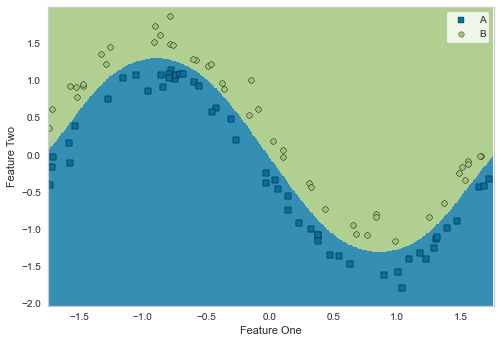

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [40]:
vizp3 = DecisionViz(
    SVC(kernel="rbf", C=10), title="gussian SVM",
    features=['Feature One', 'Feature Two'], classes=['A', 'B']
)
vizp3.fit(X_train_2, y_train_2)
vizp3.draw(X_test_2, y_test_2)
vizp3.show()

#### برای مقادیر کوچک سی  بهینه ساز به دنبال یک هایپر پلین است به گونه ای که حاشیه را حداکثر کند حتی اگر آن صفحه نقاط بیشتری را به اشتباه طبقه بندی کند به همین دلیل است که زمانی که سی را  یک صدم دادیم طبقه بندی اشتباهی دریافت کردیم

#### برای مقادیر بزرگ سی بهینه ساز یک ابر صفحه با حاشیه ی کوچک تر را انتخاب میکند در صورتی که آن ابر صفحه کارآیی بهتری در طبقه بندی صحیح تمام نقاط آموزشی ارائه دهد که همان طور که میبینیم زمانی که سی را بزرگ تر کردیم طبقه بندی به درستی انجام شد 

## gamma

C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


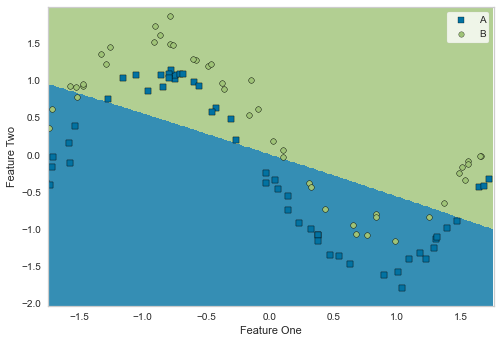

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [41]:
vizp4 = DecisionViz(
    SVC(kernel="rbf", C=1, gamma=0.01), title="gussian SVM",
    features=['Feature One', 'Feature Two'], classes=['A', 'B']
)
vizp4.fit(X_train_2, y_train_2)
vizp4.draw(X_test_2, y_test_2)
vizp4.show()

### اینجا گاما را کوچک تعیین کردیم زمانی که گاما خیلی کوچک باشد مدل بسیار محدود است و نمیتواند پیچیدگی یا شکل داده هارا ثبت کند و منطقه ی تاثیر هر بردار پشتیبان انتخابی شامل کل مجموعه ی آموزشی  میشود و مدل حاصل شبیه یک مدل خطی با مجموعه ای از ابر صفحه ها رفتار خواهد کرد

C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


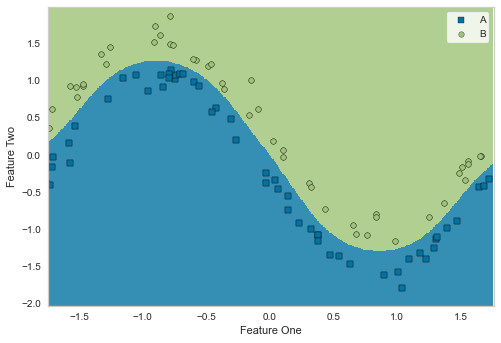

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [42]:
vizp5 = DecisionViz(
    SVC(kernel="rbf", C=1, gamma=1), title="gussian SVM",
    features=['Feature One', 'Feature Two'], classes=['A', 'B']
)
vizp5.fit(X_train_2, y_train_2)
vizp5.draw(X_test_2, y_test_2)
vizp5.show()

C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


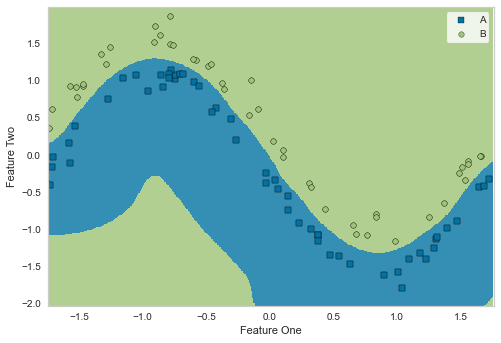

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [43]:
vizp6 = DecisionViz(
    SVC(kernel="rbf", C=1, gamma=10), title="gussian SVM",
    features=['Feature One', 'Feature Two'], classes=['A', 'B']
)
vizp6.fit(X_train_2, y_train_2)
vizp6.draw(X_test_2, y_test_2)
vizp6.show()

### اگر گاما بیش از حد بزرگ باشد شعاع ناحیه ی تاثیر بردار های پشتیبان فقط شامل خود بردار پشتیبان میشود و در این صورت هیچ مقدار منظم سازی سی هم نمیتواند از اورفیتینگ جلوگیری کند

## سوال سه

In [44]:
from sklearn import datasets
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import Normalizer
from collections import Counter

## قسمت الف

In [45]:
iris = datasets.load_iris()
df3 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])

In [46]:
df3.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [47]:
x3= df3.iloc[:, :-1]
y3= df3.iloc[:, -1]

In [48]:
x3= np.array(x3)

In [49]:
scaler4= Normalizer().fit(x3) 
normalized_x3= scaler4.transform(x3)

In [50]:
y3 =np.array(y3)

In [51]:
def distance_ecu(x_train, x_test_point):

  distances= []  
  for row in range(len(x_train)):
      current_train_point= x_train[row] 
      current_distance= 0 

      for col in range(len(current_train_point)): 
          
          current_distance += (current_train_point[col] - x_test_point[col]) **2
        
      current_distance= np.sqrt(current_distance)

      distances.append(current_distance)

  distances= pd.DataFrame(data=distances,columns=['dist'])
  return distances


In [52]:
def nearest_neighbors(distance_point, K):
  

    df_nearest= distance_point.sort_values(by=['dist'], axis=0)

    df_nearest= df_nearest[:K]
    return df_nearest

In [53]:
def voting(df_nearest, y_train):
    counter_vote= Counter(y_train[df_nearest.index])
    y_pred= counter_vote.most_common()[0][0]   # Majority Voting
    return y_pred

In [54]:
def KNN_from_scratch(x, y, K):

   
    y_pred=[]
    loo = LeaveOneOut()
    loo.get_n_splits(x)  
    for i, (train_index, test_index) in enumerate(loo.split(x)):
        x1 = np.delete(x,test_index,0)
        y1 = np.delete(y,test_index,0)
       
        t =x[test_index].flatten()
        distance_point  = distance_ecu(x1, t)  
        df_nearest_point= nearest_neighbors(distance_point, K)  
        y_pred_point    = voting(df_nearest_point, y1)
        y_pred.append(y_pred_point)
   
    
    return y_pred  


In [55]:
K=3
y_pred_scratch= KNN_from_scratch(normalized_x3, y3,K)
print(y_pred_scratch)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


## قسمت ب

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
error_k= [] 
k_values= list(range(1,51,1)) 
accuracy= 0
for k in k_values:
    
    y_pred1= KNN_from_scratch(normalized_x3, y3,k)
    accuracy= accuracy_score (y_pred1, y3)
    error_k.append(1-accuracy)


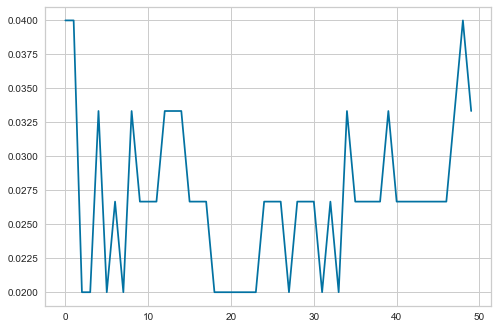

In [58]:
plt.plot(error_k)

#### زمانی که در حدود بیست است و مقدار آن 0.02 است.

## قسمت ج

## سوال چهار

## قسمت الف

In [59]:
iris = datasets.load_iris()
df4 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])

In [60]:
x4= df4.iloc[:, :-1]
y4= df4.iloc[:, -1]

In [61]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(x4,y4, test_size=0.3, random_state=0) 

## قسمت ب

In [62]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier(random_state=42)
tree = tree.fit(X_train_4,y_train_4)

In [63]:
from sklearn import metrics 
pred = tree.predict(X_test_4)
acc = metrics.accuracy_score(y_test_4, pred)
print(acc)

0.9777777777777777


In [64]:
from sklearn.model_selection import GridSearchCV

### criterion

In [65]:
param_grid = {'criterion' : ['gini', 'entropy']}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, verbose=1, cv=3)
grid_search_cv.fit(X_train_4, y_train_4)
print(grid_search_cv.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'criterion': 'gini'}


### max_depth

In [66]:
param_grid = {'max_depth':[1,2,3,4,5,8,16,32]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, verbose=1, cv=3)
grid_search_cv.fit(X_train_4, y_train_4)
print(grid_search_cv.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'max_depth': 3}


### min_sample_split

In [67]:
param_grid = {'min_samples_split': [2,3,4,5,8,12,16,20]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, verbose=1, cv=3)
grid_search_cv.fit(X_train_4, y_train_4)
print(grid_search_cv.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'min_samples_split': 2}


### max_leaf_nodes

In [68]:
param_grid = {'max_leaf_nodes': list(range(2,20,1))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, verbose=1, cv=3)
grid_search_cv.fit(X_train_4, y_train_4)
print(grid_search_cv.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
{'max_leaf_nodes': 4}


## قسمت ج

In [69]:
param_grid = {'max_depth':[3], 'max_leaf_nodes':[4], 'min_samples_split': [2],'criterion' : ['gini']}
grid_search_cv_1 = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, verbose=1, cv=3)
grid_search_cv_1.fit(X_train_4, y_train_4)
preds1 = grid_search_cv_1.predict(X_test_4)
acc_score =  metrics.accuracy_score(y_test_4, preds1)
print(acc_score)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
0.9777777777777777


## قسمت د

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_test_4, preds1)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

### سه دهم داده ها را به تست اختصاص دادیم از آنجایی که 150 تا کل داده های ما بود تعداد نمونه های تست ما برابر 45 تا خواهد بود از 16 داده ای که مربوط به دسته ی اول است  هر 16 تا درست دسته بندی شده است از 18 داده ای که مربوط به دسته ی دوم است 17 تا درست و یکی به اشتباه به دسته ی سوم اختصاص داده شده است و از 11 تا داده ای که مربوط به دسته ی سوم است هر 11 تا درست به دسته ی سوم اختصاص داده شده است و اگر مجموع این ها را نیز حساب کنیم برابر 45 تا است